In [2]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats
from numpy.linalg import norm
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

In [3]:
# lets get some 🐧 data to work with
penguins = sns.load_dataset("penguins").dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [15]:
numeric = penguins.columns[(penguins.dtypes == float)]
data = penguins[numeric]
data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
def all_linkages(data):

    tree_sing = linkage(data,method='single')
    tree_cplt = linkage(data,method='complete')
    tree_avrg = linkage(data,method='average')
    tree_ward = linkage(data,method='ward')

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    dendrogram(tree_sing, ax=axs[0,0])
    axs[0,0].set_title('Single linkage')
    xlim = axs[0,0].get_xlim()
    axs[0,0].set_yticks([])
    axs[0,0].set_xticks([])
    axs[0,0].set_xlim(xlim)


    dendrogram(tree_cplt, ax=axs[0,1])
    axs[0,1].set_title('Complete linkage')
    axs[0,1].set_yticks([])
    axs[0,1].set_xticks([])

    dendrogram(tree_avrg, ax=axs[1,0])
    axs[1,0].set_title('Average linkage')
    axs[1,0].set_yticks([])
    axs[1,0].set_xticks([])

    dendrogram(tree_ward, ax=axs[1,1])
    axs[1,1].set_title('Ward linkage');
    axs[1,1].set_yticks([])
    axs[1,1].set_xticks([])

    sns.despine(left=True, bottom=True)
    
    return tree_sing, tree_cplt, tree_avrg, tree_ward

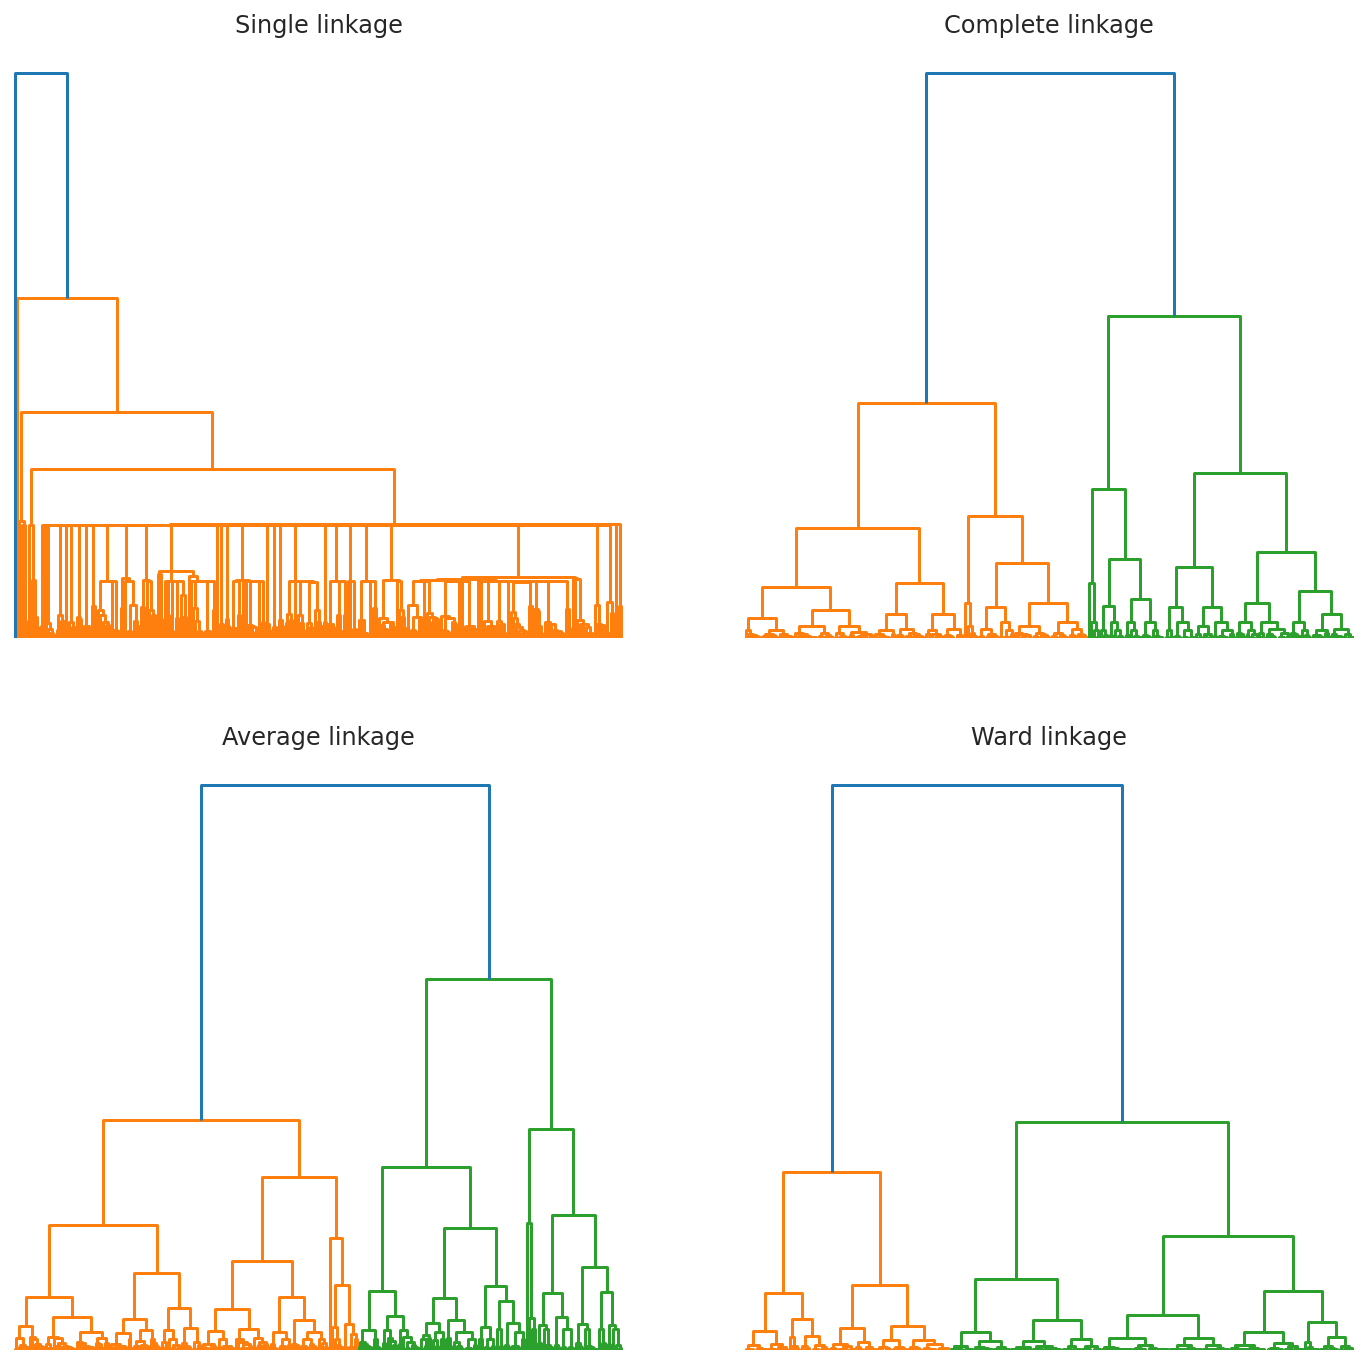

In [6]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(data)

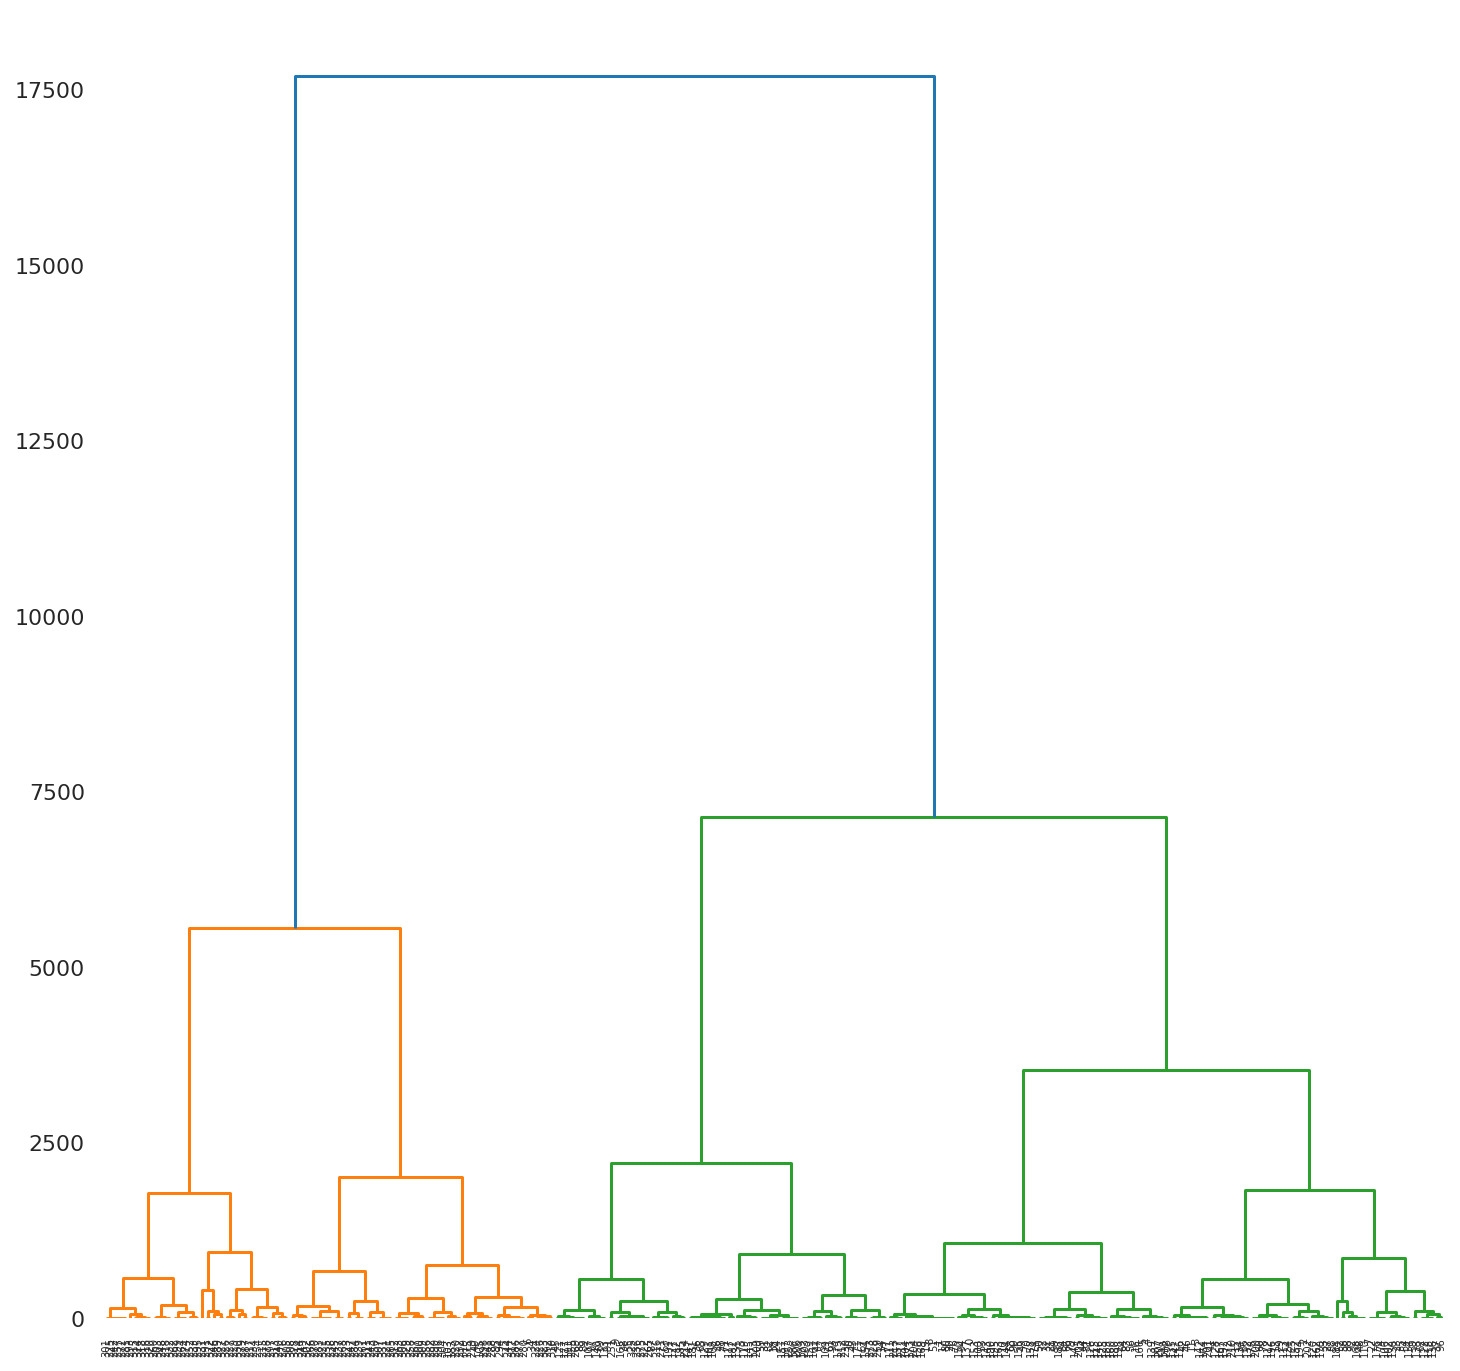

In [7]:
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [8]:
# try different values trying to pull out unique combinations of species or species-sex
clust = fcluster(tree_ward, criterion='distance', t=6000) 
clust

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 1, 3, 1, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1,
       3, 2, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
penguins['cluster']=clust
penguins.groupby('cluster')[['species','sex']].value_counts()

cluster  species    sex   
1        Gentoo     Male      61
                    Female    42
         Adelie     Male       7
         Chinstrap  Male       2
2        Adelie     Male      45
         Chinstrap  Male      17
         Gentoo     Female    16
         Chinstrap  Female     4
         Adelie     Female     1
3        Adelie     Female    72
         Chinstrap  Female    30
         Adelie     Male      21
         Chinstrap  Male      15
Name: count, dtype: int64

In [10]:
scaled_data = StandardScaler().fit_transform(data)

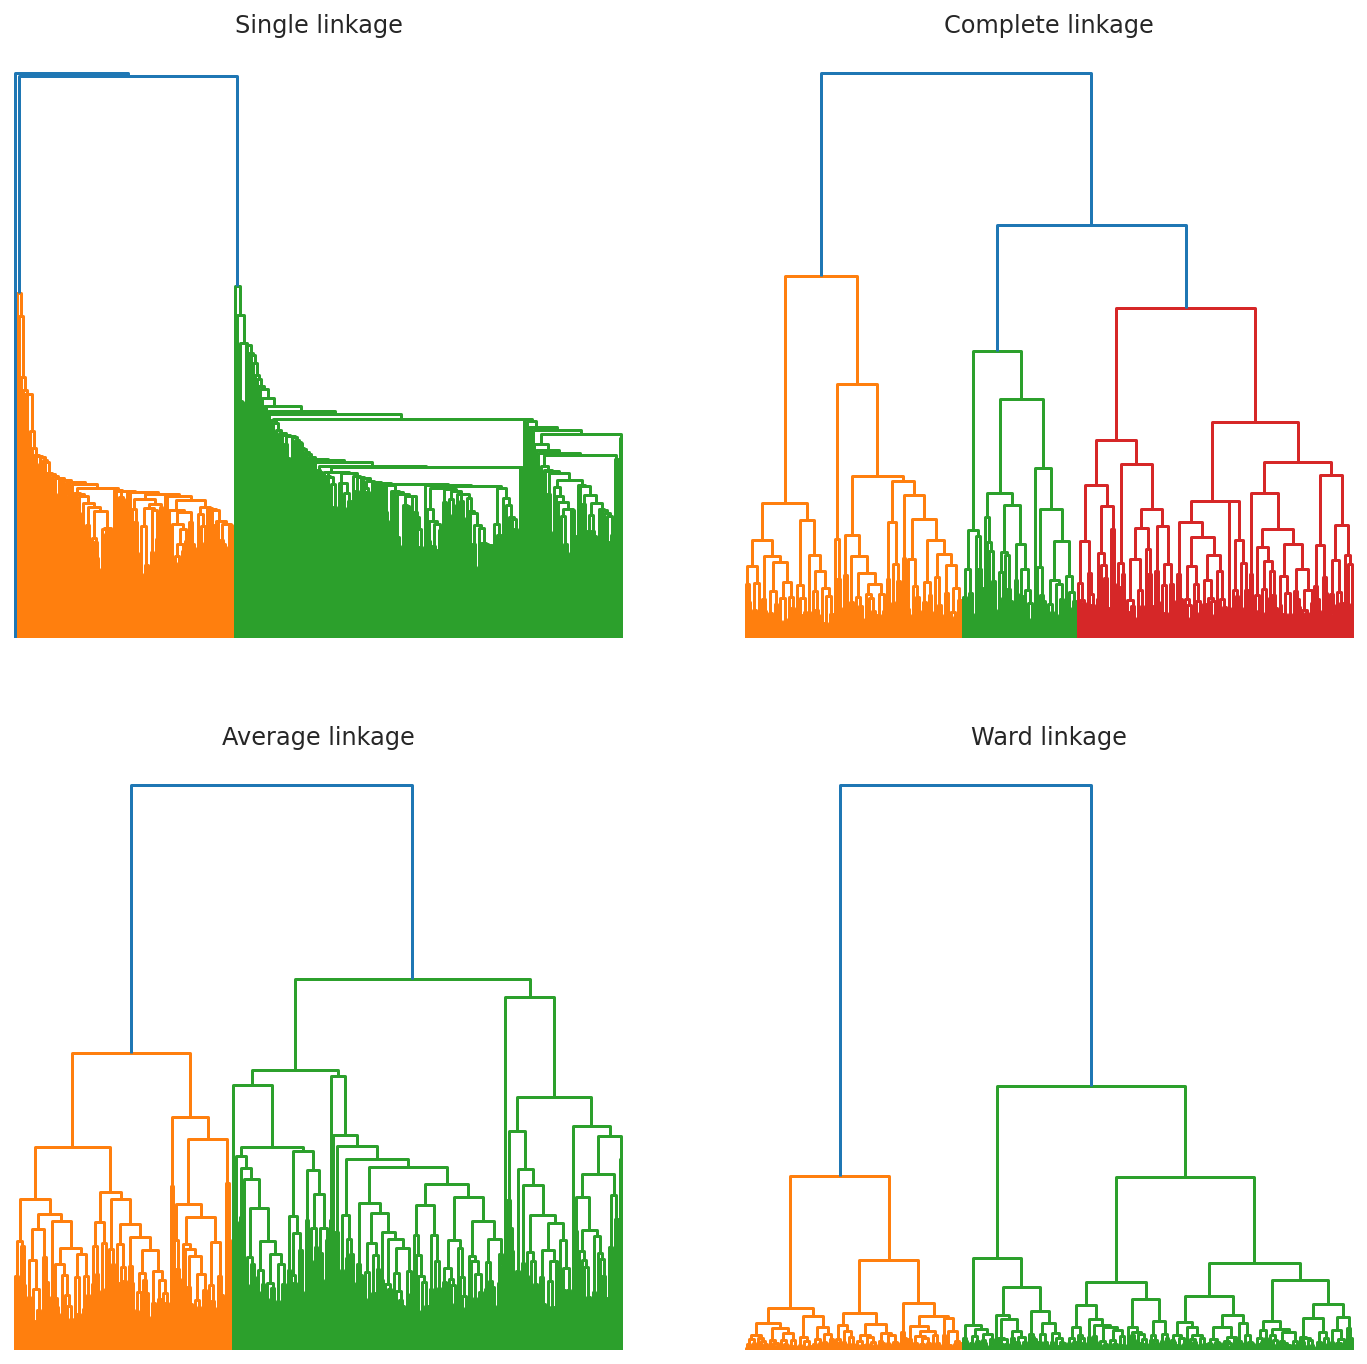

In [11]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(scaled_data)

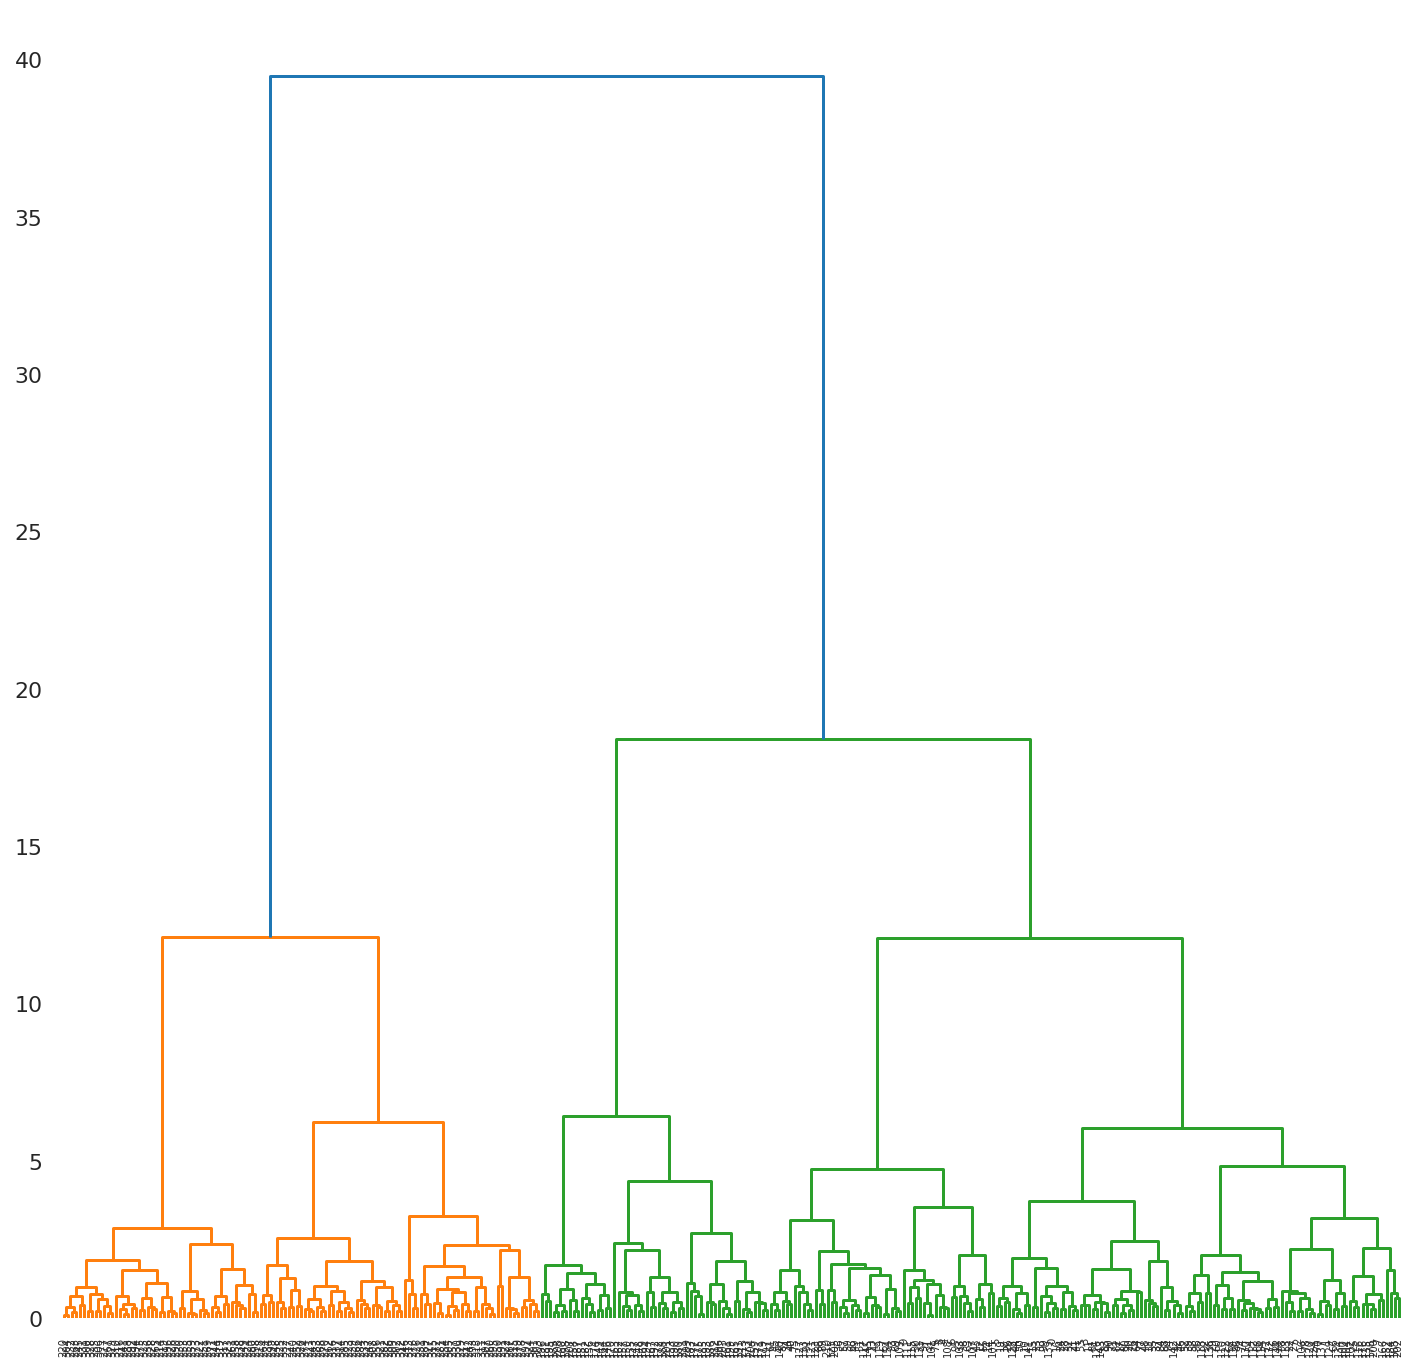

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [14]:
clust = fcluster(tree_ward, criterion='distance', t=15) 

penguins['cluster']=clust
penguins.groupby('cluster')[['species','sex']].value_counts()

cluster  species    sex   
1        Gentoo     Male      61
                    Female    58
2        Chinstrap  Male      34
                    Female    23
3        Adelie     Female    73
                    Male      73
         Chinstrap  Female    11
Name: count, dtype: int64

# Project Starts Here  

### Procedure In Shoe Recommendation
1) Load in the data from the "sneakers" folder.  
2) Run PCA on the dataset and project it onto the PC space to correct the "curse of dimensionality".  
3) Take the projected dataset with dimensionality reduction and place it inside the linkage function to run hierarchical clustering analysis.  
4) Ward looked the best, so we'll choose that type moving forward and scale down the output values.  
5) After scaling down, choose a good value to separate clusters (41.965 gave us 21 clusters and that's how many different shoe brands we had, but feel free to change it. Also be careful about the clusters that only have 1 data point inside them, it'll potentially break the system if you're not careful enough).  
6) Create a function that preprocesses the image to be ready to be compared.  
7) Compare the test image to the reduced image collection and find the image closest to the input image.  
8) Look at the cluster that the most similar image seen belonged to and recommend at most 3 images from that cluster to the user.  

Number 8 isn't implemented yet




image_collection shape is: (1, 35625)
Inside folder 1: Converse
(102, 136, 3)
(136, 3)
(102, 3)
Original shape: (95, 125, 3)


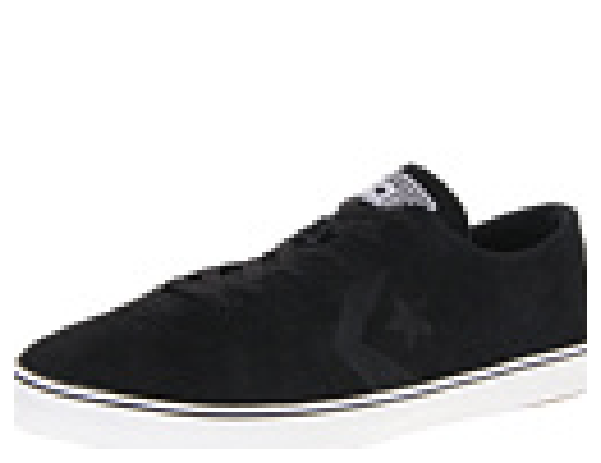

(1, 35625)
[[255. 255. 255. ... 255. 255. 255.]]
image_collection shape is: (2057, 35625)


In [237]:
from PIL import Image
import numpy as np
import os
from sklearn.metrics.pairwise import euclidean_distances

# Default parameters of the images
default_width = 136
default_length = 102
num_of_channels = 3
default_dimension = 35625

# Load in all of the images stored in the sneakers folder
# Define the collection of images
debug_collection = np.zeros((1, default_dimension))
print(f"image_collection shape is: {debug_collection.shape}")
# Pathway to the main folder that holds all types of shoes
main_path = "./sneakers"
# Makes a list of folder names found in the main folder
folders = os.listdir(main_path)
# Iterates through those folder names
for i, folder in enumerate(folders):
    # Keeps track of progress of folder dive
    print(f"Inside folder {i+1}: {folder}")
    # Creates the pathway to the folder inside the main folder 
    folder_path = os.path.join(main_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Iterate through all of the files and add them to the collection of flattened images
    for file in files:
        # Creates the pathway to the images inside the folder
        image_path = os.path.join(folder_path, file)
        # Loads the images into the notebook as a list and then changes it to a numpy array
        image_list = Image.open(image_path)
        image_np = np.array(image_list)
        print(image_np.shape)
        print(image_np[0].shape)
        print(image_np[:, 0].shape)
        rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
        cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
        # Remove rows
        image_np = np.delete(image_np, rows_to_delete, axis=0)
        # Remove columns
        image_np = np.delete(image_np, cols_to_delete, axis=1)
        print(f"Original shape: {image_np.shape}")
        plt.imshow(image_np)
        plt.axis('off')  # Turn off axis labels
        plt.show()
        image_flat = image_np.reshape(1, -1)
        # If this is the first image, index instead of stack inside the collection
        if i == 0:
            debug_collection[0] = image_flat
        else:
            debug_collection = np.vstack((debug_collection, image_flat))
        break
    break
print(debug_collection.shape)
print(debug_collection)
# for loop ends here
print(f"image_collection shape is: {image_collection.shape}")


In [123]:
# Load in all of the images stored in the sneakers folder
# Define the collection of images
image_collection = np.zeros((1, default_dimension))
print(f"image_collection shape is: {image_collection.shape}")
# Pathway to the main folder that holds all types of shoes
main_path = "./sneakers"
# Makes a list of folder names found in the main folder
folders = os.listdir(main_path)
# Iterates through those folder names
for i, folder in enumerate(folders):
    # Keeps track of progress of folder dive
    print(f"Inside folder {i+1}: {folder}")
    # Creates the pathway to the folder inside the main folder 
    folder_path = os.path.join(main_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Iterate through all of the files and add them to the collection of flattened images
    for file in files:
        # Creates the pathway to the images inside the folder
        image_path = os.path.join(folder_path, file)
        # Loads the images into the notebook as a list and then changes it to a numpy array
        image_list = Image.open(image_path)
        image_np = np.array(image_list)
        # Remove rows and columns
        rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
        cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
        image_np = np.delete(image_np, rows_to_delete, axis=0)
        image_np = np.delete(image_np, cols_to_delete, axis=1)
        # Flatten the image
        image_flat = image_np.reshape(1, -1)
        # If this is the first image, index instead of stack inside the collection
        if i == 0:
            image_collection[0] = image_flat
        else:
            image_collection = np.vstack((image_collection, image_flat))
# for loop ends here
print(f"image_collection shape is: {image_collection.shape}")


image_collection shape is: (1, 35625)
Inside folder 1: Converse
Inside folder 2: Reebok
Inside folder 3: AlexanderMcQueen
Inside folder 4: Amiana
Inside folder 5: SKECHERS
Inside folder 6: BetseyJohnson
Inside folder 7: ALDO
Inside folder 8: DSQUARED2
Inside folder 9: Crocs
Inside folder 10: Paul Smith
Inside folder 11: Nike
Inside folder 12: Lacoste
Inside folder 13: AdidasOriginals
Inside folder 14: UGG
Inside folder 15: ECCO
Inside folder 16: DVS Shoe Company
Inside folder 17: adidasY-3
Inside folder 18: KangaROOS
Inside folder 19: GUESS
Inside folder 20: Easy Spirit
Inside folder 21: Aetrex
image_collection shape is: (2057, 35625)


In [124]:
# Preprocess the data
# Because of the curse of dimensionality, we'll use PCA to reduce the dimensionality
image_collection_mean = np.mean(image_collection, axis=0, keepdims=True)
print(f"image_collection_mean shape: {image_collection_mean.shape}")

# Mean centered data
mean_centered_data = image_collection - image_collection_mean

# Choosing different values for the number of principal components to see which is better
n_components = 200
pca = PCA(n_components=n_components)
pca.fit(mean_centered_data)
reduced_image_collection = pca.transform(mean_centered_data)
print(f"reduced_image_collection shape: {reduced_image_collection.shape}")

image_collection_mean shape: (1, 35625)
reduced_image_collection shape: (2057, 200)


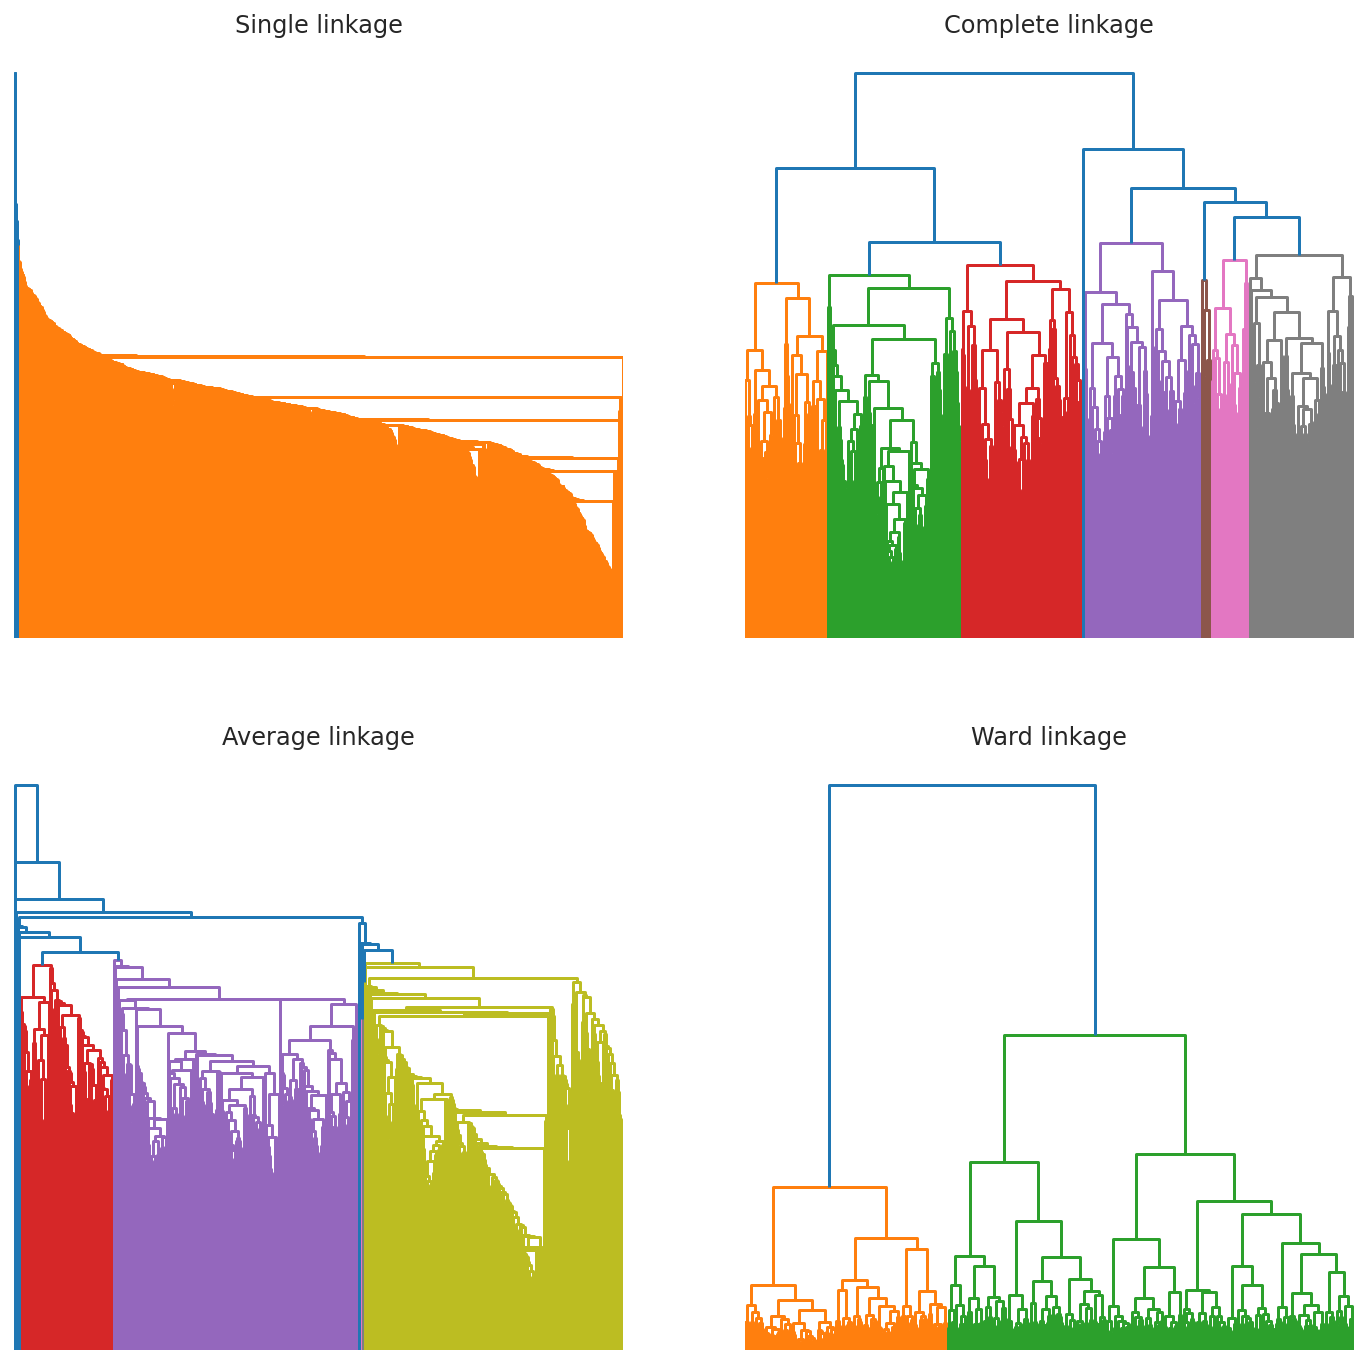

In [126]:
# Before Preprocessing
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(reduced_image_collection)

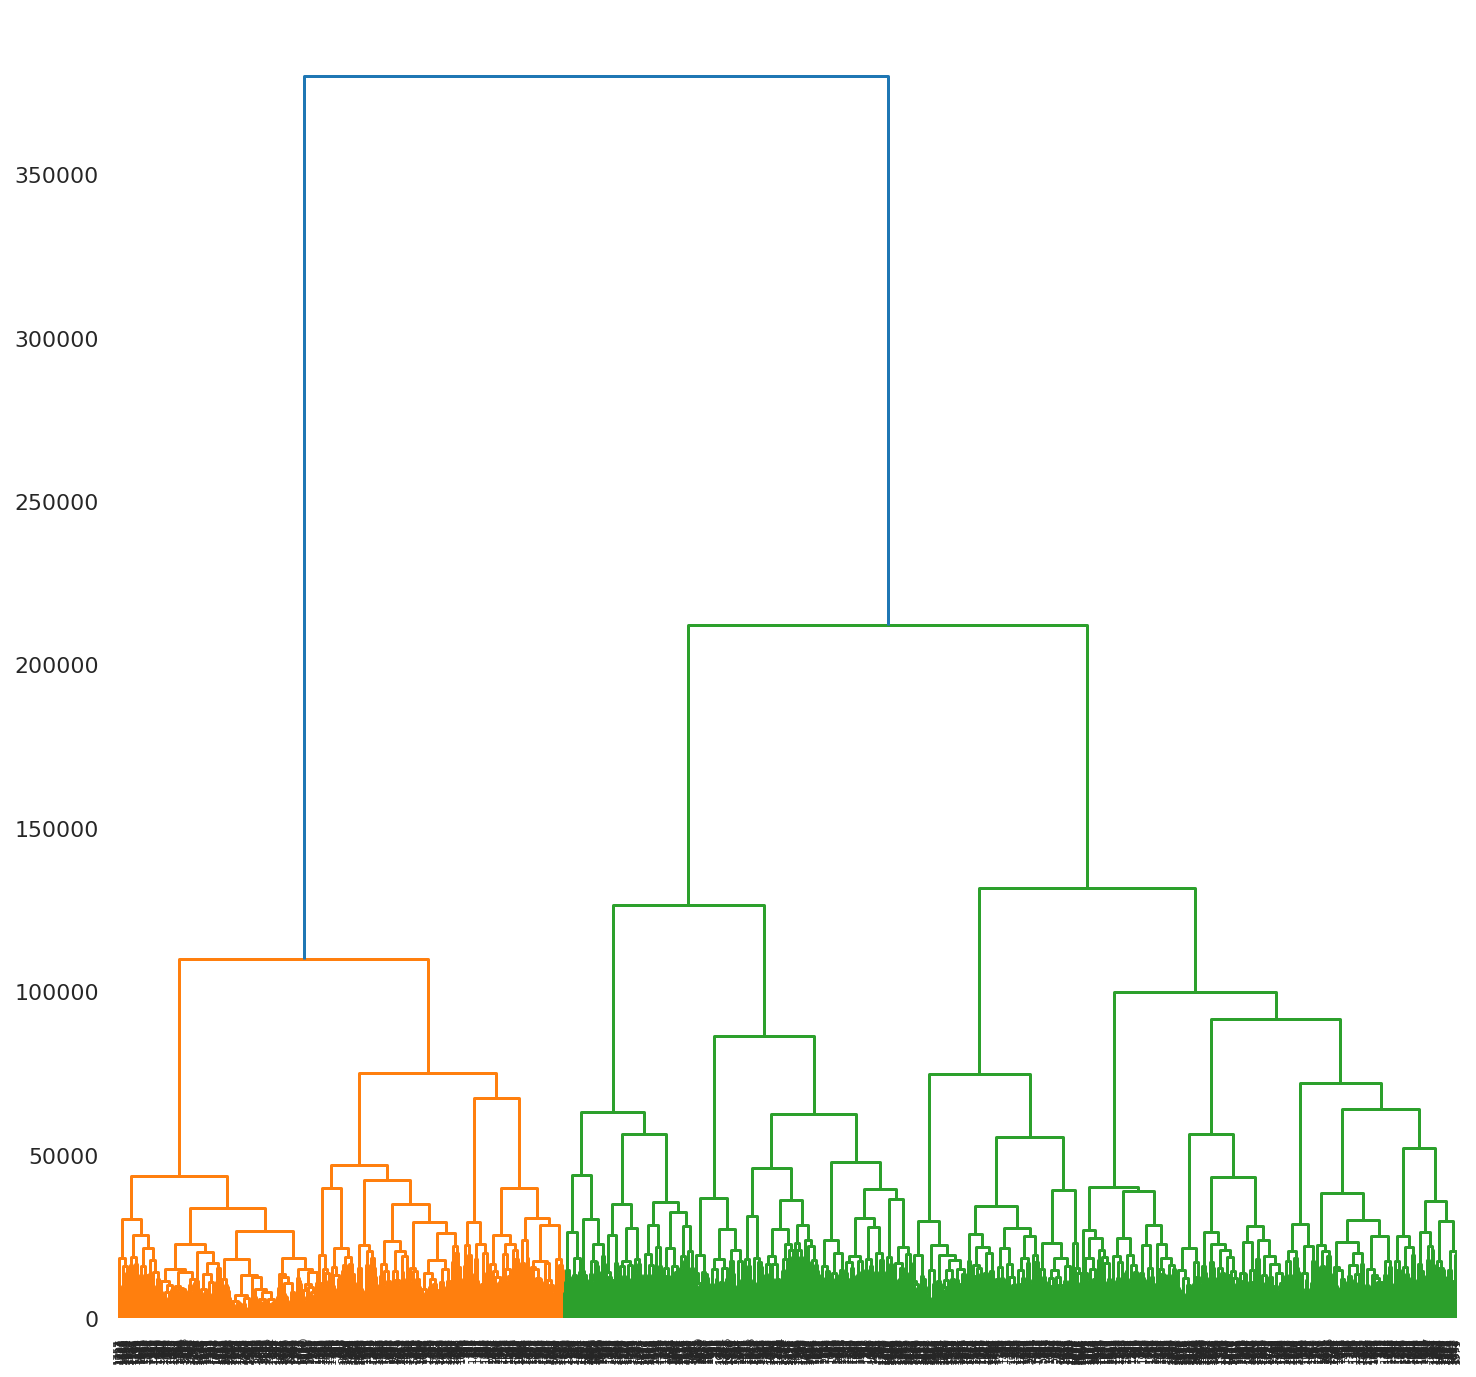

In [127]:
# Chose to use ward because it looked the most separable between clusters
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [128]:
# Lets look at the clusters
clust = fcluster(tree_ward, criterion='distance', t=75000) 
clust
# Because the separation distance between similarities are so far from each other 

array([1, 3, 1, ..., 2, 1, 5], dtype=int32)

In [130]:
scaled_data = StandardScaler().fit_transform(reduced_image_collection)

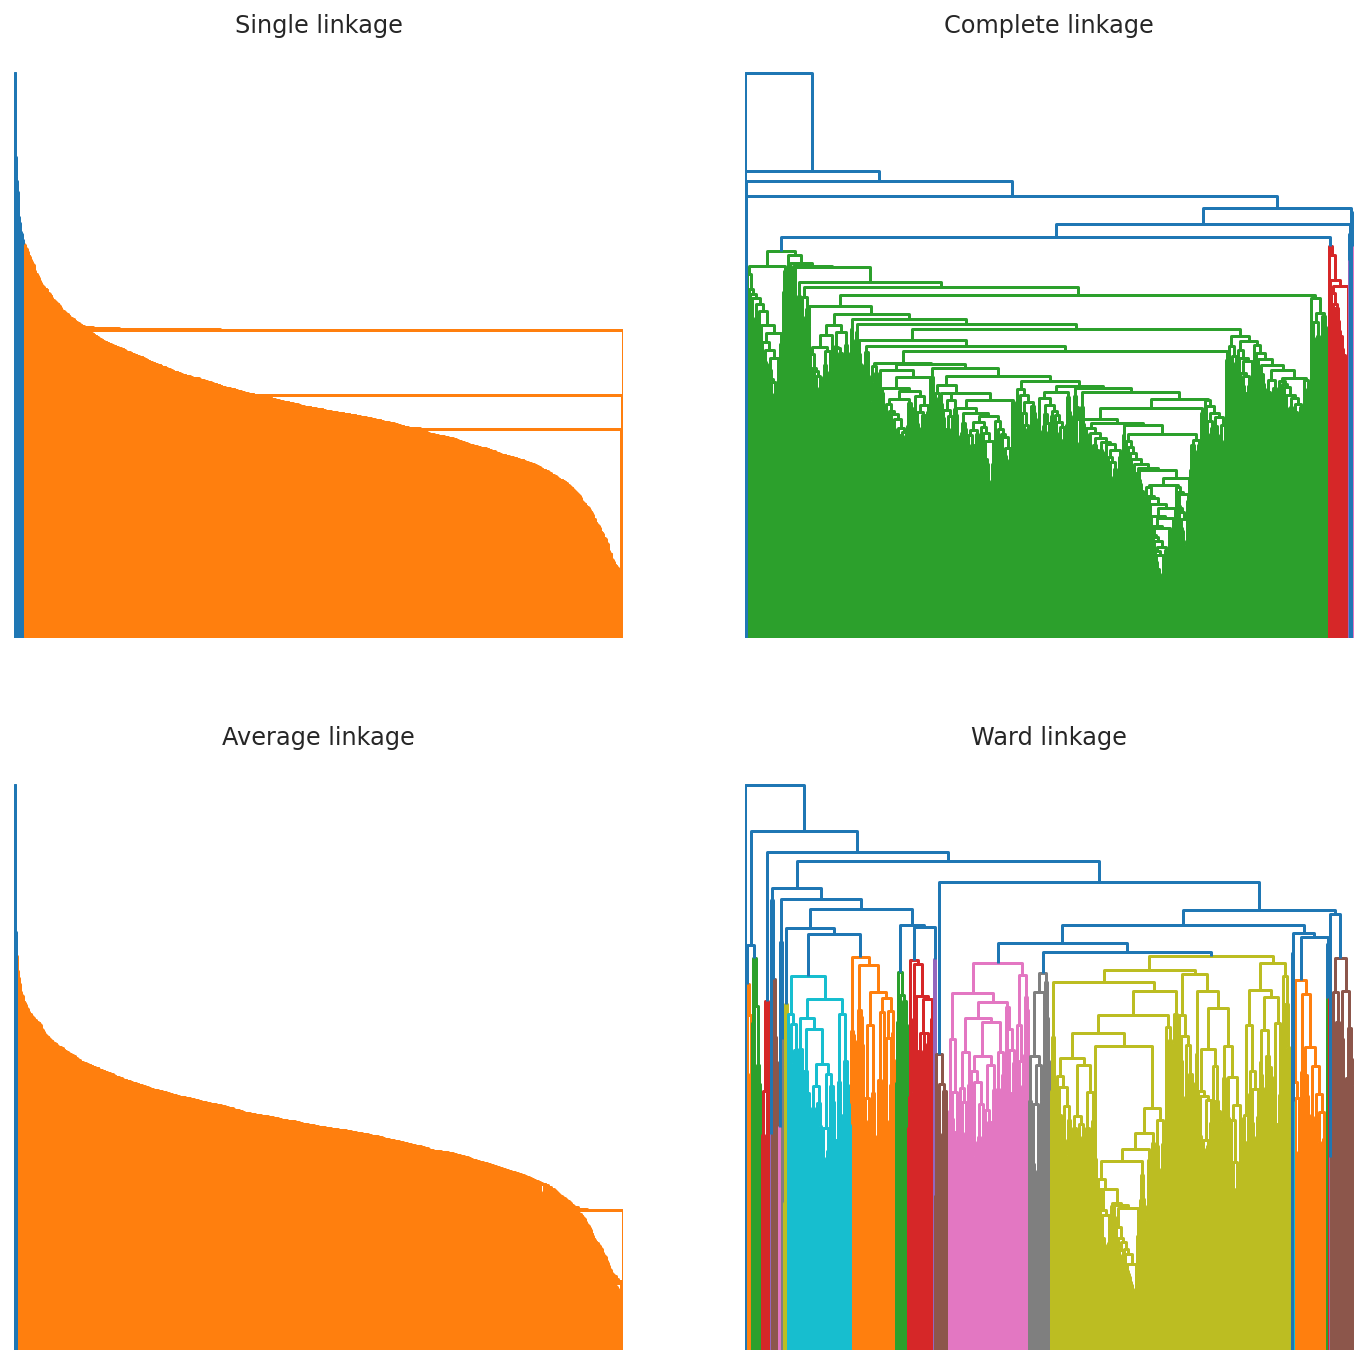

In [131]:
# After Preprocessing
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(scaled_data)

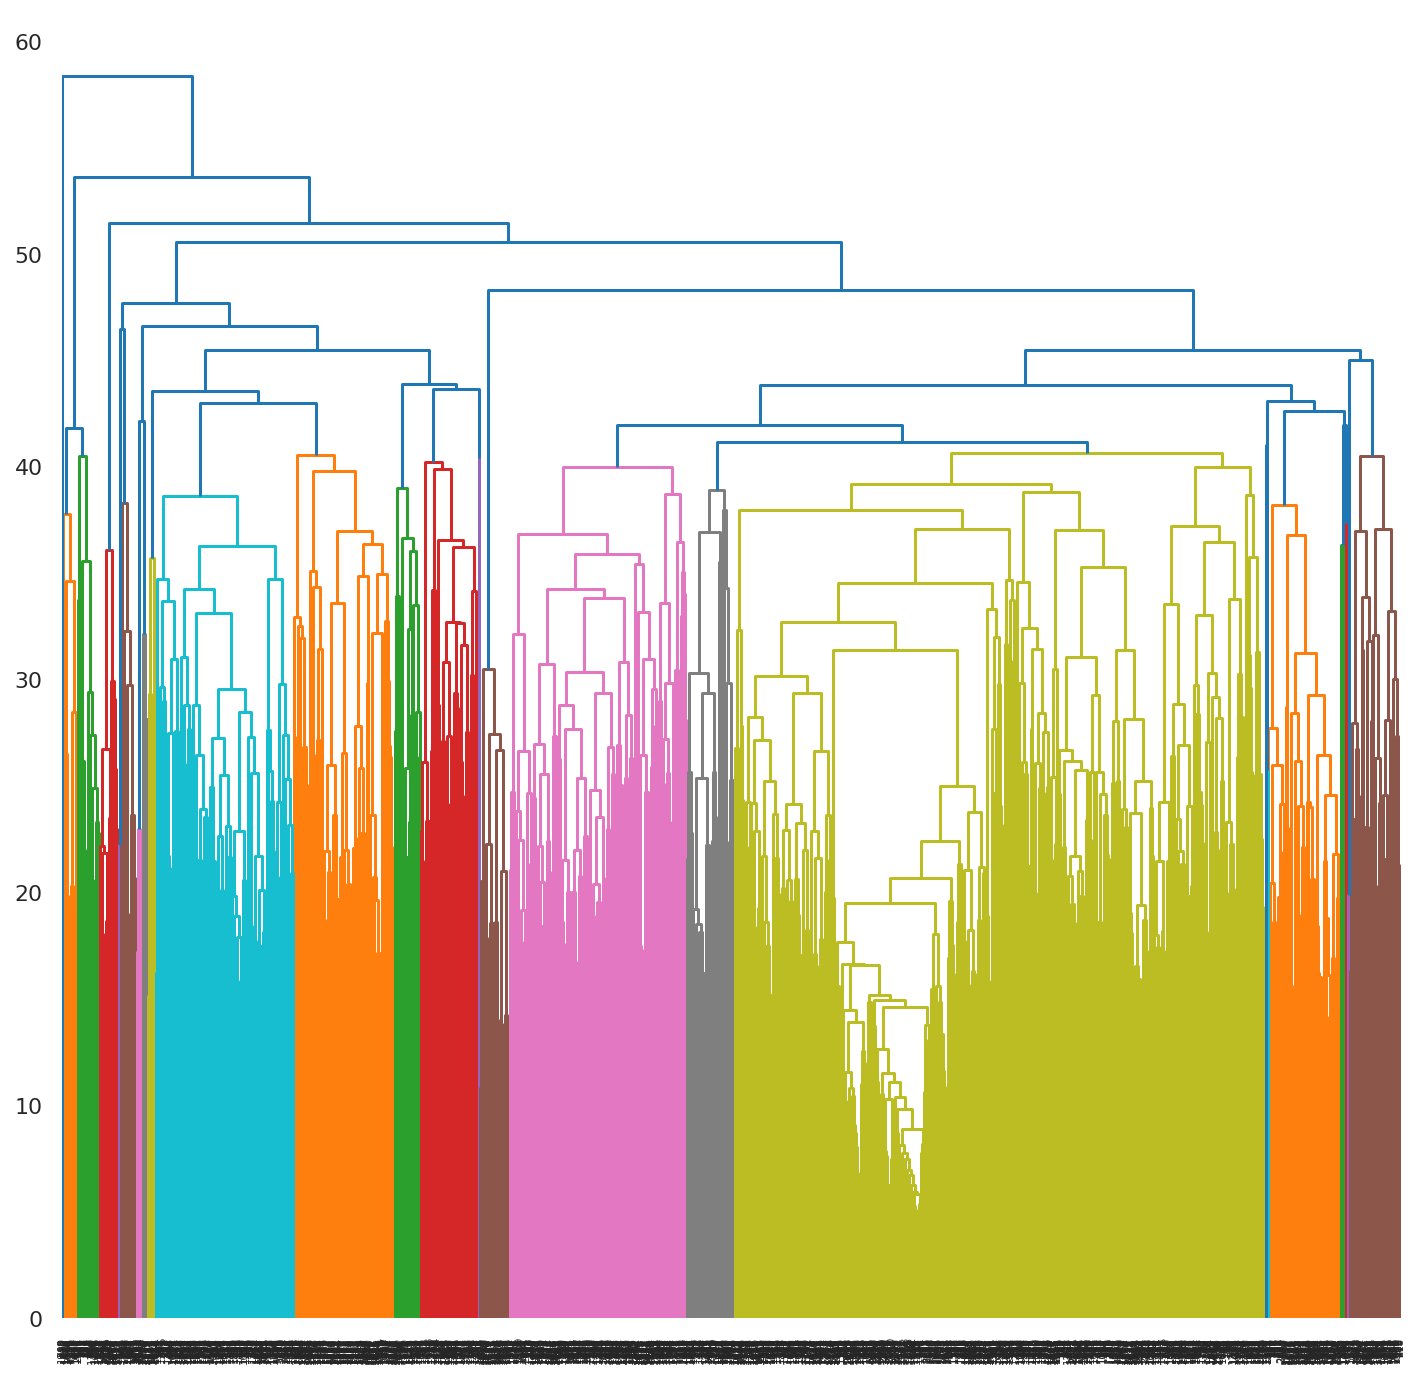

In [132]:
# Chose to use ward because it looked the most separable between clusters
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [ ]:
# Chose to use ward because it looked the most separable between clusters
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [214]:
# Lets look at the clusters
clust = fcluster(tree_ward, criterion='distance', t=42) 
clust
print(clust[:800])
# Because the separation distance between similarities are so far from each other 

[14 14 14 14 11 14  8  9 11 14 14 14 14 14 14 14 14 14 14  8  9 14 19 14
  8  8 14 14 14 14 14 19 14 14 14 14 14  8 14 14 14 18  8 14 14 10 14 14
 14 14 14 14 14  8 14 14 14 14 14 11 14 14 18  8 14 14 14 11 14 14 14 14
 14  8 14  8 14 18 10 14 11 14 14 14 14 14 14 14 14 14 14 14  2 14 14  8
 14 14 14 14 14 14 14 14 14 14 14 14  8 14 14 14 14 14 14 14 10 19 14 14
 14 11 11 14 14 11 14 11 14  8 14  1  8  8 14 14 19 14 14 11  3 14 14 14
 14  8 10 14  8 19 10 19  3 14 14  3 14  8 14 14 11 14 11 14 14 14  8 14
 11 14 10 11  8 14 14 11 14 14 14 14 14 14 11 14 14 14 14 11  4 14 14 14
 14 14 14 19  9  1  1 14 14 14 14 19 14 14 19 14 14 14 14 14 14 14 14 14
 14 14 19 19 14 14 14 14 14 16 14  8  8 14 14  1 14  2 14 16 14 14  8 14
  9 16  8 14 19  8 14 14  8 14 14 14 19 14 14 11  8  8 14  8 14 16 14 14
 16 16 14 14  8 10 19 14 16 14 14  8  8 14  8  1 14 14 14 14 14 14  8  8
 14 14 14 16 14 14 14 14 14 14 14 14 14 14 14 14 14 14  1 14 14 14 14 14
  8  8 16 16 14 16 14 14  1 14  8  1  8  1 14 14  1

In [215]:
max_number_of_clusters = 0
cluster_to_samples = {}
for elem in clust:
    if elem in cluster_to_samples:
        cluster_to_samples[elem] += 1
    else:
        cluster_to_samples[elem] = 1
    if elem > max_number_of_clusters:
        max_number_of_clusters = elem

print(f"The max number of clusters found were: {max_number_of_clusters}")
print(cluster_to_samples)
# Be careful about the clusters that only have 1 data sample to it 

The max number of clusters found were: 20
{14: 1162, 11: 88, 8: 211, 9: 155, 19: 78, 18: 3, 10: 41, 2: 29, 1: 58, 3: 3, 4: 24, 16: 112, 17: 11, 13: 45, 12: 3, 15: 3, 7: 12, 6: 9, 20: 1, 5: 9}


In [220]:

def input_image_preprocesser(pathway, PCA_arg):
    # Loads the images into the notebook as a list and then changes it to a numpy array
    image_list = Image.open(pathway)
    image_np = np.array(image_list)
    # Remove rows and columns
    rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
    cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
    image_np = np.delete(image_np, rows_to_delete, axis=0)
    image_np = np.delete(image_np, cols_to_delete, axis=1)
    # Flatten the image
    image_flat = image_np.reshape(1, -1)
    image_flat = PCA_arg.transform(image_flat)
    return image_flat

In [222]:
# Here's an example of how to use the function
# Pass in the string pathway to the jpg and it'll pass out the correct image with downsize
debug_img = input_image_preprocesser("./sneakers/AdidasOriginals/7183714.11683.jpg", pca)
print(debug_img.shape)
print(reduced_image_collection.shape)
print(image_collection.shape)
print(clust.shape)

(1, 200)
(2057, 200)
(2057, 35625)
(2057,)


In [231]:
# Step 7
# This block is for computing comparisons
input_shoe_path = "./sneakers/AdidasOriginals/7183714.11683.jpg" # Change for shoe pathway
input_shoe = input_image_preprocesser(input_shoe_path, pca)
distances = euclidean_distances(input_shoe, reduced_image_collection)
print(distances.shape)
lowest_dist = distances[0, 0]
lowest_idx = 0
for i, dist in enumerate(distances[0]):
    if dist < lowest_dist:
        lowest_dist = dist
        lowest_idx = i
print(lowest_dist)
print(lowest_idx)

(1, 2057)
22349.21206411698
51


14
[ True  True  True ... False  True False]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
(2057, 35625)
(95, 125, 3)


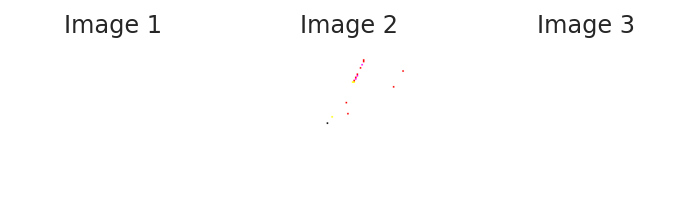

In [240]:
# Step 8
print(clust[lowest_idx])
print(clust == clust[lowest_idx])
clust_idx = clust == clust[lowest_idx]
print(image_collection[clust_idx])
print(image_collection.shape)
print((95, 125, 3))
max_images_to_rec = 3
for i, index in enumerate(clust_idx):
    if index:
        image_to_show = image_collection[i].reshape((95, 125, 3))
        plt.subplot(1, 3, 4-max_images_to_rec)  # 1 row, 3 columns, index 1
        plt.imshow(image_to_show)
        plt.title(f'Image {4-max_images_to_rec}')
        plt.axis('off')
        max_images_to_rec -= 1
        if not max_images_to_rec:
            break

            
            
